# Profile

name: R. Bimo Mandala Putra

# Import Package

In [1]:
import pandas as pd
import numpy as np
import os

#DeepLearning
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint

#Visualization
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Importing Data Set

In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

!unzip /content/rockpaperscissors.zip


Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [3]:
os.chdir(r'/content/rockpaperscissors/')

In [4]:
# Path to data set
rock=r'rps-cv-images/rock'
paper=r'rps-cv-images/paper'
scissors=r'rps-cv-images/scissors'

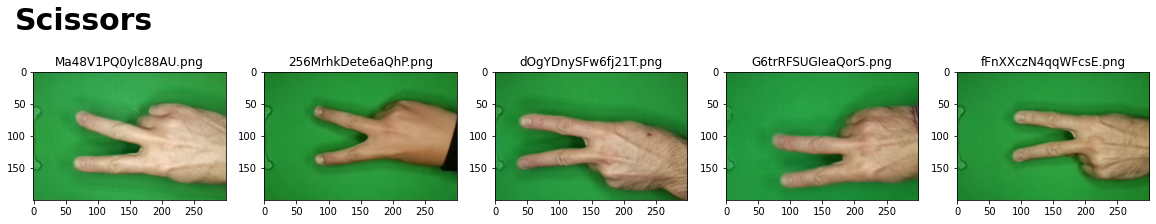

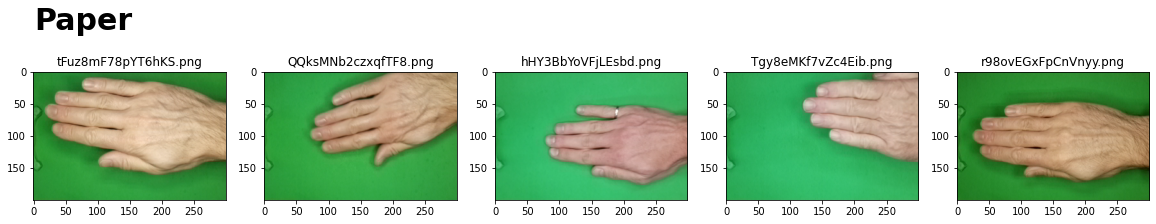

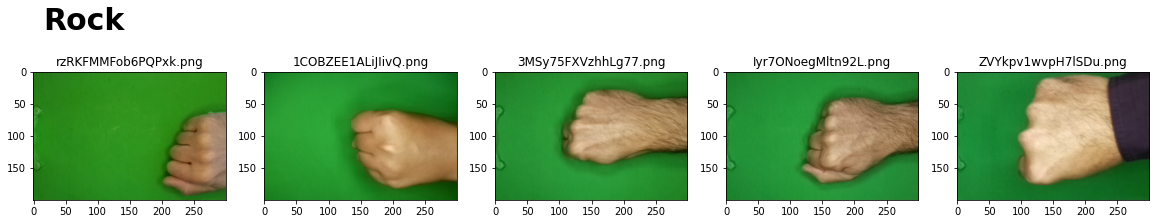

In [5]:
# Show random set of our data from different label
import random

# Show random Scissors data 
plt.figure(figsize=(20,4))
plt.suptitle('Scissors',size=30,fontweight="bold",x=0.16, y=.95)
for i in range(5):
    file = random.choice(os.listdir(scissors))
    image_path= os.path.join(scissors, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


#Show random papper data
plt.figure(figsize=(20,4))
plt.suptitle('Paper',size=30,fontweight="bold",x=0.16, y=.95)
for i in range(5):
    file = random.choice(os.listdir(paper))
    image_path= os.path.join(paper, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


#Show random rock data
plt.figure(figsize=(20,4))
plt.suptitle('Rock',size=30,fontweight="bold",x=0.16, y=.95)
plt.tight_layout()
for i in range(5):
    file = random.choice(os.listdir(rock))
    image_path= os.path.join(rock, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    


The data we got are so clean without noise,different angle, different background, different lighting, etc.<br>
Furthermore, the only difference between data are the person doing it and the position of the hand

# Data Preprocessing

## Data Augmentation

In [6]:
# create function to augment with color
def augment(image):
  image = tf.cast(image, tf.float32)

  # Randomly adjust hue, contrast and saturation.
  image = tf.image.random_hue(image, max_delta=0.05)
  image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
  image = tf.image.random_brightness(image, max_delta=0.2)
  image = tf.image.random_saturation(image, lower=0.0, upper=2.0)
  return image

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1. / 255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    vertical_flip=True,
                                    preprocessing_function = augment,
                                    validation_split=0.4,
                                    shear_range=0.2,
                                    fill_mode='nearest'
                                  )
val_datagen = ImageDataGenerator( rescale=1./255,
                                  validation_split=0.4
                                )

## Split Data set

In [8]:
data_dir='rps-cv-images'
#training generator
train_generator= train_datagen.flow_from_directory(batch_size=20,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(150, 150), 
                                                    subset="training",
                                                    class_mode='categorical'
                                                    )
#validation generator
val_generator= val_datagen.flow_from_directory(batch_size=20,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(150, 150), 
                                                    subset="validation",
                                                    class_mode='categorical',
                                                    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


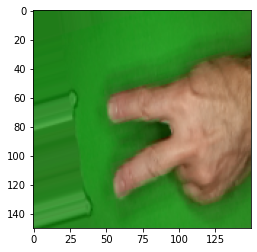

[0. 0. 1.]


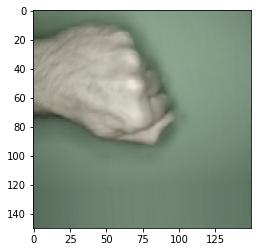

[0. 1. 0.]


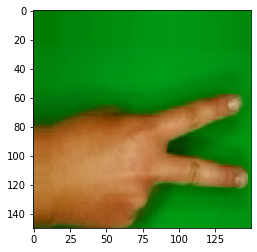

[0. 0. 1.]


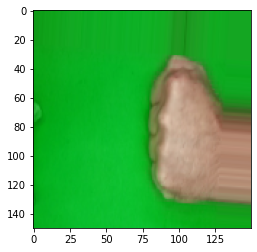

[0. 1. 0.]


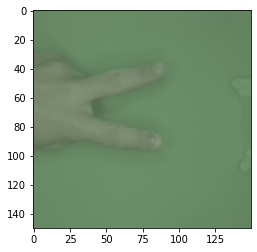

[0. 0. 1.]


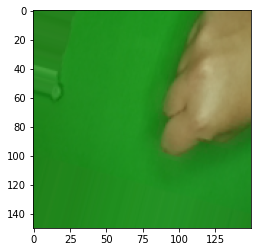

[0. 1. 0.]


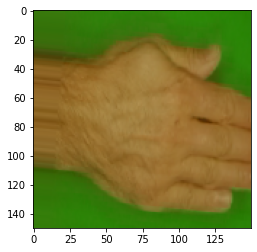

[1. 0. 0.]


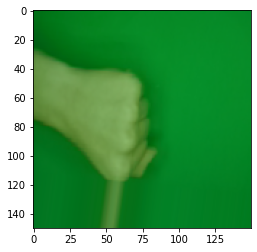

[0. 1. 0.]


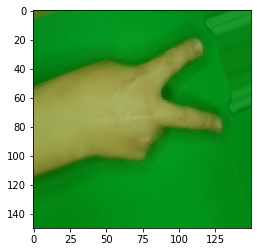

[0. 0. 1.]


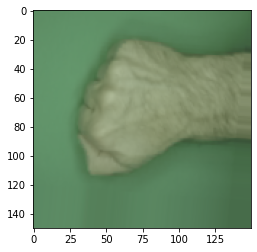

[0. 1. 0.]


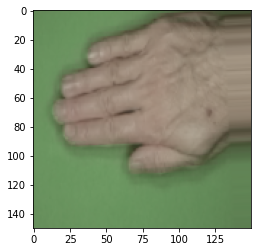

[1. 0. 0.]


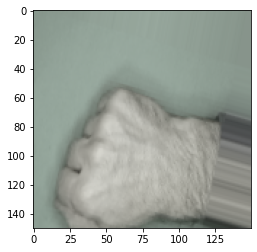

[0. 1. 0.]


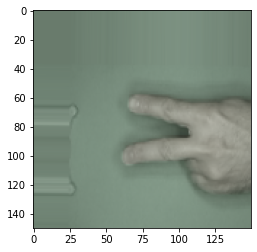

[0. 0. 1.]


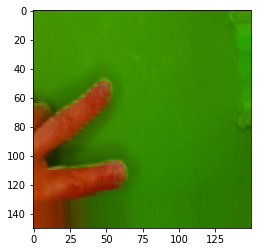

[0. 0. 1.]


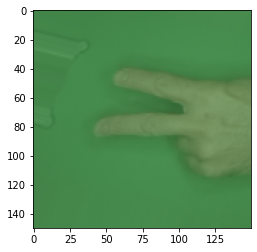

[0. 0. 1.]


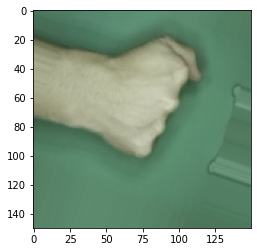

[0. 1. 0.]


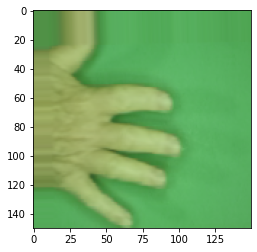

[1. 0. 0.]


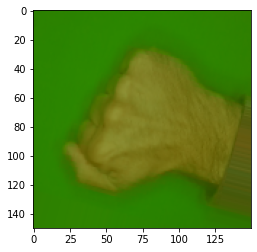

[0. 1. 0.]


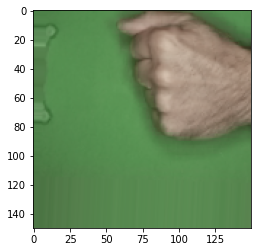

[0. 1. 0.]


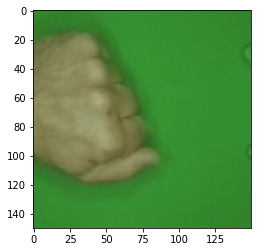

[0. 1. 0.]


In [31]:
# quick look at our training data after data augmentation
for my_batch in train_generator:
    images=my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.show()
        print(labels[i])
    break

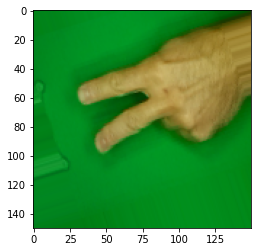

[0. 0. 1.]


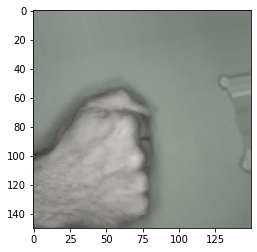

[0. 1. 0.]


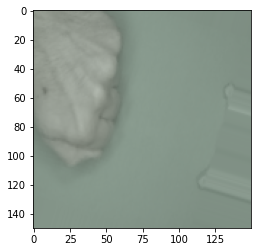

[0. 1. 0.]


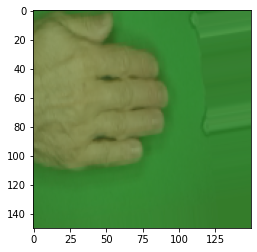

[1. 0. 0.]


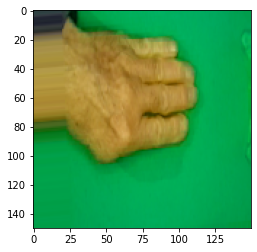

[1. 0. 0.]


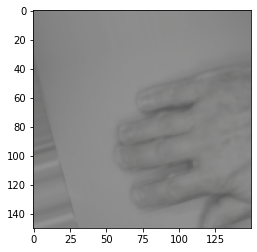

[1. 0. 0.]


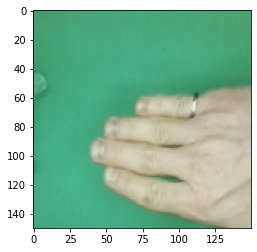

[1. 0. 0.]


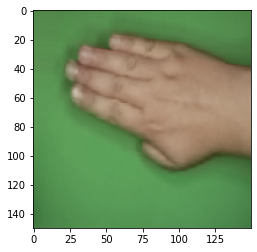

[1. 0. 0.]


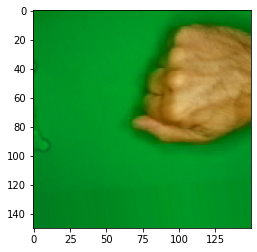

[0. 1. 0.]


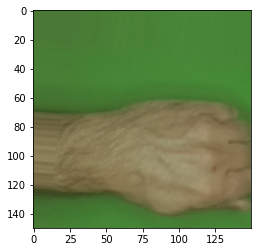

[0. 1. 0.]


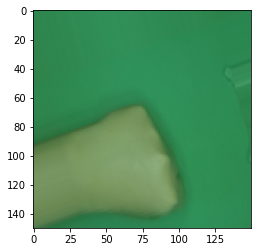

[0. 1. 0.]


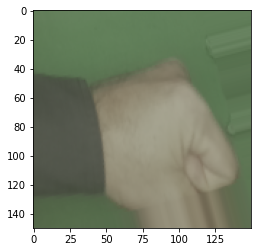

[0. 1. 0.]


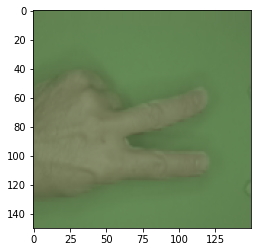

[0. 0. 1.]


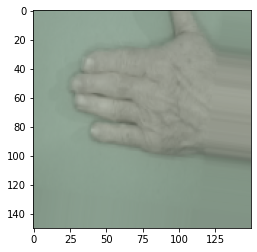

[1. 0. 0.]


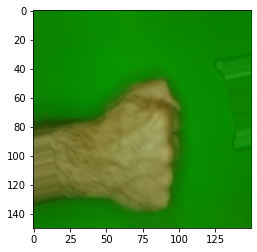

[0. 1. 0.]


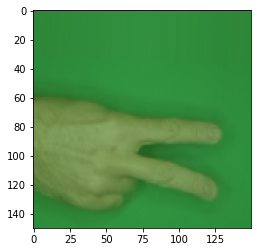

[0. 0. 1.]


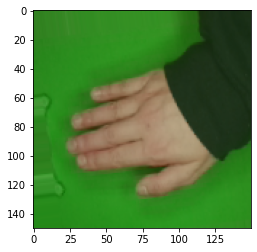

[1. 0. 0.]


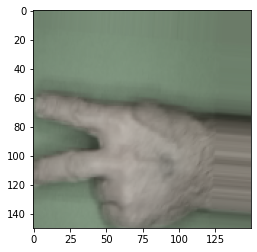

[0. 0. 1.]


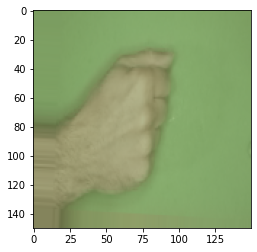

[0. 1. 0.]


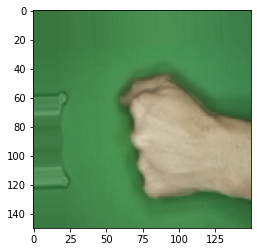

[0. 1. 0.]


In [10]:
# quick look at our training data after data augmentation
for my_batch in train_generator:
    images=my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        plt.imshow(images[i])
        plt.show()
        print(labels[i])
    break

# Modeling

In [11]:
train_generator.image_shape
classes_name=train_generator.class_indices
class_list=list(classes_name.keys())

In [12]:
classes_name.keys()

dict_keys(['paper', 'rock', 'scissors'])

In [13]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Quick look into our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
# model check point
# call back feature to allow you for stopping train in middle training while saving the best model for you
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
                            save_best_only=True, mode='auto', period=1
                            )

In [15]:
earlystop= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", #Quantity to be monitored
    min_delta=0, #Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
    patience=20, #Number of epochs with no improvement after which training will be stopped.
    verbose=1, #Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
    mode="auto", #Control whent to stop based on max or min value
    baseline=None, #Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline
    restore_best_weights=True,) #Whether to restore model weights from the epoch with the best value of the monitored quantity
    
checkpoint= ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

log= tf.keras.callbacks.TensorBoard(log_dir='./logs')

callbacks = [earlystop,checkpoint,log]


In [16]:
model.compile(loss = 'categorical_crossentropy',
            optimizer='rmsprop', 
            metrics=['accuracy']
            )

In [17]:
history=model.fit(train_generator,
                  epochs=25,
                  validation_data = val_generator, 
                  verbose = 1,
                  callbacks=callbacks
                  )
%time

Epoch 1/25
66/66 [==============================] - ETA: 0s - loss: 1.1330 - accuracy: 0.3318
Epoch 1: loss improved from inf to 1.13302, saving model to best_model.hdf5
66/66 [==============================] - 24s 231ms/step - loss: 1.1330 - accuracy: 0.3318 - val_loss: 1.0634 - val_accuracy: 0.5195
Epoch 2/25
66/66 [==============================] - ETA: 0s - loss: 1.1048 - accuracy: 0.3782
Epoch 2: loss improved from 1.13302 to 1.10478, saving model to best_model.hdf5
66/66 [==============================] - 15s 231ms/step - loss: 1.1048 - accuracy: 0.3782 - val_loss: 1.0713 - val_accuracy: 0.4611
Epoch 3/25
66/66 [==============================] - ETA: 0s - loss: 1.0137 - accuracy: 0.5190
Epoch 3: loss improved from 1.10478 to 1.01374, saving model to best_model.hdf5
66/66 [==============================] - 17s 251ms/step - loss: 1.0137 - accuracy: 0.5190 - val_loss: 0.6845 - val_accuracy: 0.6579
Epoch 4/25
66/66 [==============================] - ETA: 0s - loss: 0.8172 - accuracy:

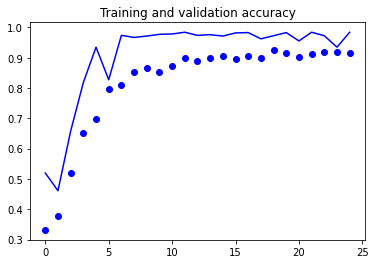

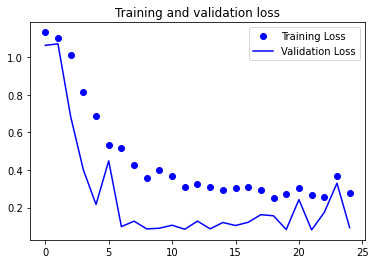

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save model
from keras.models import load_model
model.save("rockpaperscisors.h5")

Saving WhatsApp Image 2022-10-11 at 6.04.09 PM.jpeg to WhatsApp Image 2022-10-11 at 6.04.09 PM.jpeg
0
paper


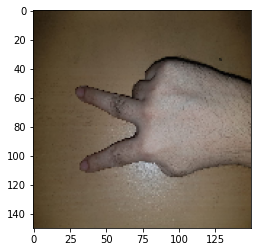

In [32]:
from google.colab import files
from tensorflow.keras.preprocessing import image
    
uploaded = files.upload()
for fn in uploaded.keys():   
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
predictions = model.predict(images, batch_size=10)
score = tf.nn.softmax(predictions[0])
print (np.argmax(score))
print(class_list[np.argmax(score)])

# Conlussion

* The final model has a 99% accuracy againts validation data
* Our train accuracy was lower than our validation test still got high score, it means our model neither over fit or under fit.
* Althought the model has good accuracy, the data set provided are really clean if new input data set got a lot of noise, background and unknown object our model might show bad permofance (showed test by own hand )  


## Next Improvement

* the scissors, paper, rock are picture with shape or gesture of an object. it means it dont need color to predict the gesture, we can change it to greyscale before processing to train, validation, and new unseen data
* we can add more data set with adding noise or background into dataset, so it can still perform better with a lot of noise.